# 배송요일 분석

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import  pymysql
db= pymysql.connect(host='localhost', user='root', password='root', db='musinsa')
curs =db.cursor(pymysql.cursors.DictCursor)
query = "SELECT delivery_day, delivery_time, count(*) FROM orders" +\
" GROUP BY delivery_day, delivery_time ORDER BY count(*) DESC;"
curs.execute(query)
rows= curs.fetchall()
for row in rows:
    print(row['delivery_day'], row['delivery_time'], row['count(*)'])
db.close

6 23:59:00 104
1 11:00:00 100
2 18:00:00 99
5 23:59:00 97
2 11:00:00 96
5 17:00:00 93
6 10:00:00 92
1 14:00:00 92
1 17:00:00 90
3 17:00:00 89
6 17:00:00 89
3 18:00:00 87
3 10:00:00 87
4 14:00:00 86
6 14:00:00 86
5 11:00:00 85
5 18:00:00 84
4 23:59:00 84
2 17:00:00 83
2 10:00:00 83
1 18:00:00 82
1 23:59:00 81
3 23:59:00 80
4 11:00:00 80
4 10:00:00 80
2 14:00:00 79
3 11:00:00 78
6 18:00:00 78
4 18:00:00 78
6 11:00:00 76
5 14:00:00 76
5 10:00:00 73
3 14:00:00 73
1 10:00:00 71
2 23:59:00 69
4 17:00:00 68


<bound method Connection.close of <pymysql.connections.Connection object at 0x000002138D3C8640>>

In [3]:
df = pd.DataFrame(rows)
df

,delivery_day,delivery_time,count(*)
0,6,0 days 23:59:00,104
1,1,0 days 11:00:00,100
2,2,0 days 18:00:00,99
3,5,0 days 23:59:00,97
4,2,0 days 11:00:00,96
5,5,0 days 17:00:00,93
6,6,0 days 10:00:00,92
7,1,0 days 14:00:00,92
8,1,0 days 17:00:00,90
9,3,0 days 17:00:00,89


In [4]:
df['delivery_day'] = df['delivery_day'].map({1:'Monday',
                                            2:"Tuseday",
                                            3:"Wednesday",
                                            4:"Thursday",
                                            5:"Friday",
                                            6:"Saturday"})

In [8]:
#df['delivery_time']= df['delivery_time'].dt.hour
df['delivery_time']= df['delivery_time'].map({10: "10:00 - 13:00",
                                             11: "11:00 - 14:00",
                                             14: "14:00 - 17:00",
                                             17: "17:00 - 20:00",
                                             18: "18:00 - 21:00",
                                             23: "Anytime"})
df

,delivery_day,delivery_time,count(*)
0,Saturday,Anytime,104
1,Monday,11:00 - 14:00,100
2,Tuseday,18:00 - 21:00,99
3,Friday,Anytime,97
4,Tuseday,11:00 - 14:00,96
5,Friday,17:00 - 20:00,93
6,Saturday,10:00 - 13:00,92
7,Monday,14:00 - 17:00,92
8,Monday,17:00 - 20:00,90
9,Wednesday,17:00 - 20:00,89


In [10]:
df= df.pivot('delivery_time', "delivery_day", "count(*)")
df

delivery_day,Friday,Monday,Saturday,Thursday,Tuseday,Wednesday
delivery_time,,,,,,
10:00 - 13:00,73,71,92,80,83,87
11:00 - 14:00,85,100,76,80,96,78
14:00 - 17:00,76,92,86,86,79,73
17:00 - 20:00,93,90,89,68,83,89
18:00 - 21:00,84,82,78,78,99,87
Anytime,97,81,104,84,69,80


In [11]:
df=df[['Monday','Tuseday','Wednesday','Thursday','Friday','Saturday']]
df

delivery_day,Monday,Tuseday,Wednesday,Thursday,Friday,Saturday
delivery_time,,,,,,
10:00 - 13:00,71,83,87,80,73,92
11:00 - 14:00,100,96,78,80,85,76
14:00 - 17:00,92,79,73,86,76,86
17:00 - 20:00,90,83,89,68,93,89
18:00 - 21:00,82,99,87,78,84,78
Anytime,81,69,80,84,97,104


# Heat map Cmap

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'


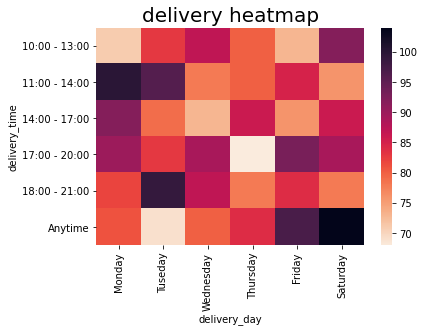

In [18]:
sns.heatmap(df, cmap='rocket_r')
plt.title("delivery heatmap", fontsize=20)
plt.show()

# 제품 분석

In [19]:
import  pymysql
db= pymysql.connect(host='localhost', user='root', password='root', db='musinsa')
curs =db.cursor(pymysql.cursors.DictCursor)
query = "SELECT products_id, sum(products_quantity) FROM carts" +\
" GROUP BY products_id ORDER BY sum(products_quantity) DESC;"
curs.execute(query)
rows= curs.fetchall()
for row in rows:
    print(row['products_id'], row['sum(products_quantity)'])
db.close

850 71
889 70
792 67
795 67
883 65
900 65
749 62
787 62
784 61
746 60
726 59
788 59
791 59
808 59
872 59
834 58
896 58
867 57
744 56
799 56
849 56
882 56
760 55
737 54
721 53
736 53
776 53
833 52
868 52
897 52
777 51
838 51
855 51
886 51
887 51
733 50
738 50
739 50
768 50
780 50
789 50
814 50
827 50
864 50
762 49
832 49
869 49
871 49
894 49
734 48
756 48
793 48
802 48
826 48
724 47
732 47
747 47
758 47
828 47
829 47
835 47
843 47
866 47
888 47
727 46
748 46
806 46
807 46
813 46
865 46
885 46
891 46
731 45
757 45
766 45
797 45
856 45
861 45
895 45
754 44
767 44
811 44
824 44
852 44
870 44
723 43
750 43
753 43
765 43
798 43
801 43
819 43
831 43
845 43
847 43
790 42
815 42
725 41
729 41
752 41
771 41
783 41
785 41
796 41
800 41
874 41
892 41
774 40
875 40
880 40
728 39
742 39
805 39
810 39
836 39
759 38
770 38
817 38
818 38
823 38
842 38
858 38
873 38
884 38
722 37
848 37
779 36
809 36
816 36
841 36
846 36
854 36
1337 36
772 35
778 35
822 35
839 35
857 35
898 35
735 33
755 33
775 33
877 3

1573 8
1597 8
1631 8
1661 8
1699 8
1702 8
1706 8
1708 8
1718 8
1720 8
1740 8
1746 8
1763 8
1816 8
1840 8
1864 8
1872 8
1895 8
1897 8
1938 8
1947 8
1996 8
2027 8
2039 8
2049 8
2087 8
2095 8
2111 8
2125 8
2133 8
2135 8
2170 8
2183 8
2196 8
2198 8
2211 8
2219 8
2233 8
2238 8
2244 8
2259 8
2260 8
2284 8
2292 8
2295 8
2296 8
2298 8
2305 8
2308 8
2312 8
2323 8
2332 8
2385 8
2404 8
3 7
23 7
40 7
53 7
68 7
108 7
115 7
120 7
141 7
144 7
158 7
172 7
179 7
211 7
223 7
225 7
243 7
269 7
276 7
289 7
344 7
347 7
390 7
407 7
408 7
423 7
425 7
430 7
433 7
434 7
437 7
441 7
446 7
453 7
454 7
472 7
505 7
516 7
523 7
527 7
543 7
544 7
551 7
573 7
579 7
595 7
596 7
628 7
630 7
633 7
639 7
665 7
672 7
678 7
717 7
903 7
920 7
933 7
934 7
977 7
982 7
986 7
1004 7
1053 7
1059 7
1060 7
1080 7
1083 7
1156 7
1174 7
1195 7
1219 7
1220 7
1225 7
1229 7
1242 7
1251 7
1280 7
1295 7
1297 7
1314 7
1345 7
1351 7
1371 7
1394 7
1412 7
1418 7
1421 7
1424 7
1433 7
1434 7
1454 7
1458 7
1466 7
1491 7
1495 7
1505 7
1506 7
1509

<bound method Connection.close of <pymysql.connections.Connection object at 0x0000021392FBF220>>

In [21]:
import  pymysql
db= pymysql.connect(host='localhost', user='root', password='root', db='musinsa')
curs =db.cursor(pymysql.cursors.DictCursor)
query = "SELECT carts.products_id, products.name, sum(carts.products_quantity)" +\
" FROM carts INNER JOIN products ON carts.products_id = products.id" +\
" GROUP BY products_id ORDER BY sum(products_quantity) DESC;"
curs.execute(query)
rows= curs.fetchall()
for row in rows:
    print(row['products_id'],row['name'], row['sum(carts.products_quantity)'])
db.close

850 10/30 배송 [Mmlg] 1987MMLG HOOD (DEEP BLUE) 71
889 10/27 배송 타이홀드 후드 그레이 JJHD7408 70
792 10/19 배송 PO HEART KNIT(SKY BLUE) 67
795 3일 지연 캐시미어 라운드 니트 BLACK 67
883 C.r.e.a.m Hoody (Gray) 65
900 5일 지연 스몰 어센틱 로고 후디 그레이 65
749 11/6 배송 SCOUTS BOY KNIT(L/BEIGE)_CTTZIKT02UE3 62
787 10/20 배송 램스울 크루넥 오버니트(머스타드) 62
784 네이쳐 스트라이프 니트_리프 그린 61
746 원톤 체리 패턴 니트 JA [핑크] 60
726 5일 지연 케이블 니트 V넥 카키 59
788 수피마 코튼 크루 넥 니트 [스카이 블루] 59
791 [유아인 착장상품]캐시미어 100 터틀 넥 니트 [블랙] 59
808 엘프 캐시미어 니트 우드 59
872 M/G SIGN LOGO HOODIE PURPLE 59
834 스몰 사인 로고 후디 그레이 58
896 [NYPM] DISTRUST HOODIE (BLK) 58
867 11/6 배송 구미 베어 로고 후디_그레이(IK2AFMM420A) 57
744 WAPPEN V NECK  KNIT SWEATER_BLACK 56
799 Geometric Knit (Brown) 56
849 T-Logo Hooded Sweatshirt Charcoal (003) 56
882 LOCATION HOODIE JA [LIGHT PURPLE] 56
760 10/30 배송 미니멀 울 반목폴라 니트 [샌드] 55
737 STRIPE COLLAR V NECK KNITWEAR_NAVY 54
721 1+1 미니멀 컷팅 라운드 니트 53
736 탑필 캐시미어 라운드 니트 (퍼플티라미슈) 53
776 롱 슬리브 롤업 오버핏 니트 K6 더스트 차콜 53
833 10/22 배송 THIRD LOGO HOODIE GREY(MG2AFMM400A) 52
868 K288 로

436 브라운 체크 셋업 블레이져 18
468 쿨 린넨 오버사이즈 셋업 블레이저 [OATMEAL] 18
657 소프트 베이직 터틀넥 니트 블랙 18
893 10/28 배송 2020 SIGNATURE HOODIE_navy 18
932 10/22 배송 다크니스 후드 네이비 MJHD7427 18
960 미들 체리 후드 JS [멜란지 그레이] 18
1072 [K121] 미드 웨이트 풀오버 후드티 (헤더 그레이) 18
1077 리오 오버핏 벌룬 후드 그레이 KJHD2304 18
1143 Kitten Boxy Sweatshirt  [BLACK] 18
1287 11/6 배송 부클 쿠퍼 로고 크루넥 크림 18
1294 10/20 배송 스몰 엔젤 크루넥 포시 그린 18
1306 리 빅 로고 맨투맨 - 블랙 18
1350 스티브 자수 맨투맨+ WHMWA4924U 18
1397 1967 JET BLACK JEANS [WIDE STRAIGHT] 18
1422 #0220 Elaboration straight crop fit 18
1456 10/16 배송 GL Wide Jeans - Mid Blue / Wide 18
1523 Raw Darkness / NewCrop 18
1639 테이퍼드 히든 밴딩 크롭 슬랙스 [라이트 그레이] 18
1773 우먼즈 세미 부츠 컷 슬랙스 [블랙] 18
1891 5일 지연 플리스 집업 자켓 블랙 18
1901 솔리드 트윌 코튼 하프 자켓_블랙 18
1974 퍼플리스 시그니처패치집업 WHMZA4T11U 18
2003 10/30 배송 빅로고 보아 플리스 점퍼 - 블랙 18
2017 REVERSIBLE FLEECE TRACK JACKET NAVY(MG2AWMB931A) 18
2051 헤비 후리스(fleece) 로고 집업 자켓 블랙 18
2058 N204UFT930 코스토니 플리스 뽀글이 풀집업 PINK 18
2203 20FW OG se 카고조거 슬랙스 Black 18
2221 우먼즈 스웨트 조거 팬츠 [멜란지 그레이] 18
2271 투 라인 트랙 팬츠 (CP

1666 마스터 핏 9컷 슬랙스 블랙 14
1680 라이트웨이트 와이드 히든 밴딩 크롭 슬랙스 [블랙] 14
1693 테이퍼드 히든 밴딩 크롭 슬랙스 [그레이] 14
1710 앨런 테이퍼드핏 슬랙스 2종 블랙 KJLP2121 14
1893 11/6 배송 엔젤 플리스 집업 아이보리 14
1909 샤기 플리스 집업 재킷 [블랙] 14
1927 브이넥 라이트 다운 재킷 [블랙] 14
2001 DURABLE N-1 DECK JACKET 002 _ OLIVE 14
2055 WAPPEN FLEECE JACKET(BLACK)_CTTZPJK08UC6 14
2077 N204UFT910 몬타나 유니 니트 풀집업 CARBON BLACK 14
2130 코튼 집업 워크 재킷 [블랙] 14
2137 BUTTON FLEECE JUMPER_NAVY 14
2153 폴라 플리스 풀집업 (베이지) [GFZ401H43BEA] 14
2159 NN4FL51C_스노우 시티 플리스 자켓 14
2234 스킨업 플리츠 릴렉스 팬츠_Black 14
2257 11/3 배송 와이드 이지 스웨트팬츠 그레이 KJLP2179 14
2273 Deep One Tuck Sweat Pants [Black] 14
2311 [얇은Ver]스트롱코튼 카고 (빈티지카키) 14
2315 에센셜 나일론 카고포켓 와이드 2에이치 라인 팬츠 블랙 14
2328 [UNISEX] 세미 와이드 스트링 카고팬츠 (베이지) 14
2330 3 스트라이프 팬츠 - 블랙 / DV1549 14
2361 M 머스트해브 3S 테이퍼드팬츠 - 그레이 / FK6885 14
2378 리복X RMTCRW 비전 투 클래식 팬츠 - 블랙 / GL1296 14
2420 츄리닝 조거팬츠 P900 14
11 T-Logo L/SL Top Black 13
30 T-Logo L/SL Top White 13
46 LONGSLEEVE Snake painting LOGO TEE black 13
56 폰테 터틀 넥 긴팔 티셔츠 [블랙] 13
60 베이식 긴팔 티셔츠 [차콜 그레이] 13

264 오버핏 레이어드 롱티셔츠 블랙 KJLT2153 11
268 ORIGIN LOGO LS TEE NAVY (MG1JFMT551A) 11
271 베이식 블레이저 [블랙] 11
283 오버핏 3버튼 블레이져 (블랙) 11
288 라이트웨이트 베이식 블레이저 [차콜 그레이] 11
312 스탠다드 핏 블레이저 - 블랙 11
321 [썸머 ver.] 리노린넨 오디너리 스탠다드 블레이져 _Black 11
340 우먼즈 베이식 블레이저 [베이지] 11
375 [NF] CHAIN SHORT JACKET (BLK)(20FW-F613) 11
413 베이식 울 블레이저 [네이비] 11
417 세미오버핏 3버튼 자켓 (블랙) 11
473 오버사이즈 셋업 블레이저 [CREAM] 11
518 이지커즈 오버 자켓 블랙 11
568 탑필 울 라운드 니트 (그레이) 11
571 10/23 배송 소프트코튼 드랍숄더 오버핏 와플 니트 OATMEAL 11
585 10/21 배송 화란 세미오버 니트 라벤더 11
600 스티브 헤리티지 스웨터 WHKAA4T22U 11
609 10/15 배송 UNBALANCE BOLERO KNIT TOP - GREY 11
612 [세트상품]BASIC TURTLENECK POLA KNIT_9 COLOR 11
647 11/16 배송 Ambition 라운드 니트 체리레드 (MM0X51NS16) 11
683 [CHUPA CHUPS X RMTCRW]CHAIN KNIT_OATMEAL 11
687 쿨 소프트 숏 슬리브 크루넥 니트 티브라운 11
696 10/20 배송 AURORA KNIT(BLACK)_CTTZIKT01UC6 11
907 RLPH500 오리지널 로고 후드티 - 시멘트 11
917 10/30 배송 매니심볼 후드 아이보리 KHHD6074 11
919 M-Logo Hood (GL1THU024BK) 11
927 미드웨이트 풀오버 후드 블랙 / K121-001 11
955 11/3 배송 LMC HEART GLOBE HOODIE black 11
956 Fleece Stri

500 시그니처 체크 자켓_차콜 9
545 탑필 캐시미어 라운드 니트 (블랙) 9
547 11/3 배송 MIXED BOUCLE KNIT LONG SLEEVE BLACK 9
567 10/15 배송 Jellybean Sweater(BLUE) 9
604 탑필 울 라운드 니트 (버건디) 9
605 10/20 배송 disco crop knit 9
635 쿨 소프트 숏 슬리브 카라 니트 티브라운 9
641 10/28 배송 [스탠다드]20FW MOHAIR CREW NECK KNIT SKY 9
645 쿨 소프트 숏 슬리브 크루넥 니트 빈티지브라운 9
649 10/19 배송 PO HEART KNIT(BLACK) 9
653 탑필 캐시미어 라운드 니트 (카키그레이) 9
659 램스울 크루넥 오버니트(브라운) 9
682 화란 세미오버 니트 팝 그린 9
685 [유아인 착장상품]미니멀 크루 넥 니트 [브라운] 9
712 하프 폴라 니트 티셔츠 아이보리 9
714 PUP SKETCH KNIT _ BEIGE 9
909 [835585] 클럽 기모 후드티 (블랙) 9
915 스탠다드 후드 스웨트 셔츠 - 블랙 9
924 [Mmlg] MMLG HOOD (WHITE) 9
970 LOCATION HOODIE JA [OLIVE GREEN] 9
1039 레터링 타투 후드 기모 그레이 9
1042 5일 지연 픽셀 로고 후디 크림 9
1048 Arch Logo Hoodie Black 9
1052 로즈체인 포커 후드 그레이 9
1061 피그먼트다잉 후드 9
1066 5일 지연 푸투라 로고 후디 블랙 9
1070 GRADATION HOODIE_black 9
1092 M-Logo Sweat (GL5TSU841BK) 9
1097 유니섹스 플레르 엠보더리 스웻셔츠 atb560u(BLACK) 9
1108 10/20 배송 베이스먼트 냅핑 워싱 스웨트셔츠[차콜] 9
1109 스몰 사인 로고 크루넥 그레이 9
1116 10/27 배송 C 로고 크루넥 네이비 9
1151 10/19 배송 스몰 엔젤 크루넥 그레이 9
11

2367 피그먼트다잉 팬츠 7
2371 타투 디테일 스웨트 팬츠 블랙 7
2381 아웃라인 플리스 스웻팬츠 - 그레이 / FM3916 7
2387 5일 지연 어센틱 로고 스웻 팬츠 그레이 7
2405 락업 트랙팬츠 - 마린 / FM9885 7
2412 베이식 로고 레깅스 7
2418 Daily Sweat Pants (Melange) 7
19 스트라이프 롱 슬리브 블루 6
42 [쿨탠다드]쿨탠다드 크루 넥 긴팔 티셔츠 [블랙] 6
71 스몰 사인 로고 롱 슬리브 블랙 6
85 롱슬리브 무지 터틀넥 6
125 벤트 레이어드 티셔츠 [D.NAVY] 6
132 RLL306 로얄라이프 크루 롱슬리브 - 화이트 6
143 폰테 크루 넥 긴팔 티셔츠 [다크 그레이] 6
145 로고&스마일리 긴팔티셔츠_블랙(IK2AFMT554A) 6
156 트레포일 립 롱슬리브 - 블랙 / FM1506 6
170 유니섹스 그래비티 로고 티-블랙 6
181 베이식 긴팔 티셔츠 [라벤더] 6
191 C.r.e.a.m SEMI OVER FIT LONG SLEEVE(TUNGSTEN GRAY) 6
200 Basic Logo Over-Fit L/S T-Shirts(Black) 6
222 루즈핏 더블코튼 티셔츠 6
241 베이직 크루넥 긴팔 티셔츠 _PHA5TR3930OWT 6
242 유니섹스 오버핏 어트랙트 스트라이프 티-오렌지 6
277 [유아인 착장상품]릴렉스드 베이식 블레이저 [블랙] 6
295 오버사이즈 미니멀 체크 블레이저 [BEIGE] 6
324 우먼즈 코튼 린넨 오버사이즈 블레이저 [블랙] 6
338 더블 브레스트 블레이져 (더스티 베이지) 6
343 오버사이즈 3버튼 블레이저 [블랙] 6
345 컨셔스 싱글 수트 (6 Colors) 6
349 [유아인 착장상품]오버사이즈 더블 브레스티드 블레이저 [블랙] 6
357 10/28 배송 울 체크 헤비 블레이저 브라운 6
372 더블 브레스트 블레이져 (차콜) 6
384 M1836 세미오버핏 스탠다드 싱글 블레이저 6
397 시어서커 블레이저 

1904 YETI ZIP UP JACKET_OATMEAL 5
1913 N204UFT930 코스토니 플리스 뽀글이 풀집업 SUGAR SWIZZLE IVORY 5
1919 10/27 배송 리버시블 플리스 코드 후드 집업 자켓 스모크 그레이 5
1930 [2차 재입고] 보아 프리스 우븐 집업 [Ivory] 5
1933 5일 지연 플리스 노카라 자켓 그레이 5
1937 SP 모노 리버시블 플리스 자켓-블랙 5
1940 라이트 다운 셔츠 재킷 [블랙] 5
1966 10/20 배송 양털 플리스 집업 자켓_Black 5
1971 리버시블 보아 자켓_EJ4UHJK239 5
1975 COMFORTABLE HALF ZIP-UP FLEECE (BLACK) [LROWCFN781MBKA] 5
1979 테디 재킷 - 화이트 / FU3926 5
1980 10/30 배송 사이드라인 플리스 후드 점퍼 - 아이보리 5
1987 우먼즈 플리스 칼라리스 재킷 [베이지] 5
1990 N204UFT970 오르카 마이크로 플리스 폴라텍 풀집업 DEEP SEA NAVY 5
2004 플리스 반넥 집업 (GL4TZU191BK) 5
2012 M/G BOA FLEECE JACKET IVORY 5
2019 [노스페이스] NJ4FL53J_화이트라벨 리모 후드 플리스 자켓 5
2038 스티브 플리스 자켓 WHJKA4922U 5
2043 M/G BOA FLEECE VEST IVORY 5
2063 양털 후리스 집업 5
2067 ODPL 헤비 오버핏 후리스 집업 자켓 오트밀_양털집업 5
2112 [노스페이스] NJ4FL56E_남성 노벨티 세이브 더 얼스 플리스 자켓 5
2126 NJ4FL58L_화이트라벨 컴피 플리스 집업 5
2138 쿠키도우 코듀로이 피쉬테일 자켓 크림 CJOT7424 5
2148 NN4FL57A_스노우시티 2 EX 플리스 자켓 5
2202 10/30 배송 레프리젠트 트랙 팬츠 (CP0011) 5
2213 10/30 배송 파이핑 트랙 팬츠 (CP0104) 5
2239 남성용 NSW 클럽 OH 저지 팬츠

<bound method Connection.close of <pymysql.connections.Connection object at 0x000002139306EE20>>

In [22]:
import pandas as pd
df= pd.DataFrame(rows)
df

,products_id,name,sum(carts.products_quantity)
0,850,10/30 배송 [Mmlg] 1987MMLG HOOD (DEEP BLUE),71
1,889,10/27 배송 타이홀드 후드 그레이 JJHD7408,70
2,792,10/19 배송 PO HEART KNIT(SKY BLUE),67
3,795,3일 지연 캐시미어 라운드 니트 BLACK,67
4,883,C.r.e.a.m Hoody (Gray),65
...,...,...,...
2325,2265,FIKA PANTS 피카 팬츠 [블랙],1
2326,2299,사이드 트랙 팬츠(CP0062-1),1
2327,2324,W 우븐 팬츠 - 블랙 / FL1954,1
2328,2335,DEFCON CARGO JOGGER (GREY),1


In [23]:
df =pd.DataFrame(rows)
name = df['name'][0:20]
total = df['sum(carts.products_quantity)'][0:20]

In [24]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
path = "C:/Windows/Fonts/malgun.ttf"
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc("font", family=font_name)

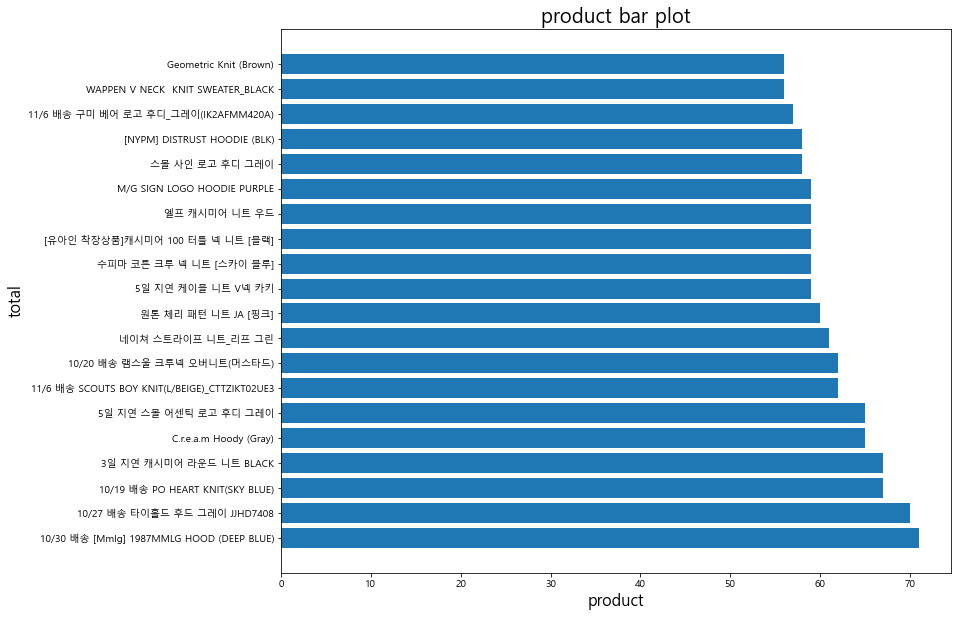

In [27]:
plt.figure(figsize=(12,10))
plt.barh(name, total)
plt.title('product bar plot', fontsize=20)
plt.xlabel('product', fontsize=16)
plt.ylabel('total', fontsize=16)
plt.yticks(name, fontproperties=font_name)
plt.show()

# 브랜드 분석

In [69]:
import  pymysql
db= pymysql.connect(host='localhost', user='root', password='root', db='musinsa')
curs =db.cursor(pymysql.cursors.DictCursor)
query = "SELECT carts.products_id, products.name, sum(carts.products_quantity), products.brand" +\
" FROM carts INNER JOIN products ON carts.products_id = products.id" +\
" GROUP BY brand ORDER BY sum(products_quantity) DESC;"
curs.execute(query)
rows= curs.fetchall()
for row in rows:
    print(row['products_id'],row['name'], row['sum(carts.products_quantity)'], row["brand"])
db.close

1 베이식 긴팔 티셔츠 [화이트] 3460 무신사 스탠다드
8 10/27 배송 레이어드 어센틱 롱슬리브 블랙 1080 커버낫
3 스트라이프 롱 슬리브 블랙 851 마크 곤잘레스
88 M MH BOS 롱슬리브 SJ - 블랙 / EB5266 617 아디다스
308 울 오버핏 블레이져 (블랙) 617 쿠어
12 롱슬리브 헤비 오버핏 스크레치 로고R 블랙 594 꼼파뇨
16 벤트 레이어드 티셔츠 [BLACK] 530 드로우핏
11 T-Logo L/SL Top Black 473 디스이즈네버댓
108 에센셜 롱 슬리브 티셔츠 화이트 470 커스텀어클락
676 블랑 스트라이프 니트 블랙 MJKN7310 443 더블유브이프로젝트
144 [Mmlg] MMLG LSV-T (BLACK) 415 엠엠엘지
550 10/30 배송 소프트코튼 드랍숄더 오버핏 와플 니트 BLACK 378 니티드
52 챔피온 롱슬리브 티셔츠 6color 354 챔피온
252 RMTCRW LOGO LONG SLEEVE_BLACK 340 로맨틱크라운
1353 10/15 배송 1931 OBJECT JEANS [CROP STRAIGHT] 337 브랜디드
47 10/16 배송 체리 스탠다드 롱 슬리브 티셔츠 JA [블랙] 295 키르시
321 [썸머 ver.] 리노린넨 오디너리 스탠다드 블레이져 _Black 288 라퍼지스토어
1363 10/16 배송 Night Rain - MOD7 crop 275 모드나인
9 10/20 배송 [패키지] 오버핏 레이어드 롱티셔츠 패키지 KJLT2153 269 제멋
256 10/20 배송 SIGNATURE LOGO LONG SLEEVE T-SHIRTS_tiedye 264 5252 바이 오아이오아이
403 유니섹스 인사이드아웃 뉴 대디 자켓 awa357u(GREEN CHECK) 264 앤더슨벨
13 [기획상품] 베이직 레이어드 티셔츠 [블랙/아이보리] 263 미나브
54 LMC 3D CO LONG SLV TEE black 255 엘엠씨
369 19FW COLLARLESS CORDURO

174 리파인드 롱슬리브 - 2 PACK 5 텐블레이드
422 카라리스 블레이저 (블랙) 5 주드맥콜
529 Glen Check Two Button Jacket [Beige] 5 에스에스와이
531 미니멀 블레이저 (3버튼-그레이) 5 오버더원
998 RUSSEL HOODIE BLACK/WHITE 5 디파스칼
1281 Club Sweatshirt 1635 BLACK 5 캉골
1694 탄체크 와이드 팬츠 (블랙) 5 오피셜가먼트
1853 [UNISEX] 와이드 밴딩 슬랙스 _ 블랙 5 음
2063 양털 후리스 집업 5 애플앤딥
2287 [사은품 증정] 빅포켓  패치 카고 조거팬츠_BK 5 아티스트웨어
2293 프리미엄 지퍼 테크웨어 카고 조거팬츠 VER.1 [사계절VER] 5 0.387에이유
2390 20S PLEATS BANDING PANTS (BLACK) 5 38컴온커먼
133 식스레이어드 스트라이프 긴팔(네이비) 4 해비즘
140 화이트라벨 포켓 롱 슬리브 티셔츠 블랙 4 벤 데이비스
533 컨셔스 세미오버 블레이져 - 블랙 4 시티브리즈
1020 [312007GR] 플레임 후드 - 그레이 4 쓰레셔
1262 [세트상품] 리콰이어드 피그먼트 세트 4 페이커서울
1536 IN#0043 네츄럴 오프화이트 워싱  크림 와이드 4 인로우스
1939 PATCH CHEST POCKET FLEECE JACKET (BLACK) [GFZ404H43BKA] 4 세인트페인
2280 빅포켓 카고 조거팬츠_BK 4 카네브로스
486 헤리티지 울 자켓 블랙 3 러닝하이
1065 10/16 배송 Oops bear 오버핏 기모 후드 티셔츠 AHP701(black) 3 엠블러
1347 B-CUT SWEATSHIRTS_BLACK 3 잇터
2313 조거 스웻팬츠 (그레이) 3 로커드
208 SHIRRING POINT T BLACK 2 바이바이섭
961 Basic Logo Hoodie - BLACK 2 아임낫어휴먼비잉
983 10/26 배송 HEAVY WEIGHT PULLOVER HOODIE

<bound method Connection.close of <pymysql.connections.Connection object at 0x000002901CFE0BB0>>

## 상위 10개 브랜드

In [70]:
import pandas as pd
df =pd.DataFrame(rows)
brand = df['brand'][0:20]
total = df['sum(carts.products_quantity)'][0:20]

In [71]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
path = "C:/Windows/Fonts/malgun.ttf"
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc("font", family=font_name)

In [72]:
import seaborn as sns
colors = sns.color_palette('tab20b',len(brand))

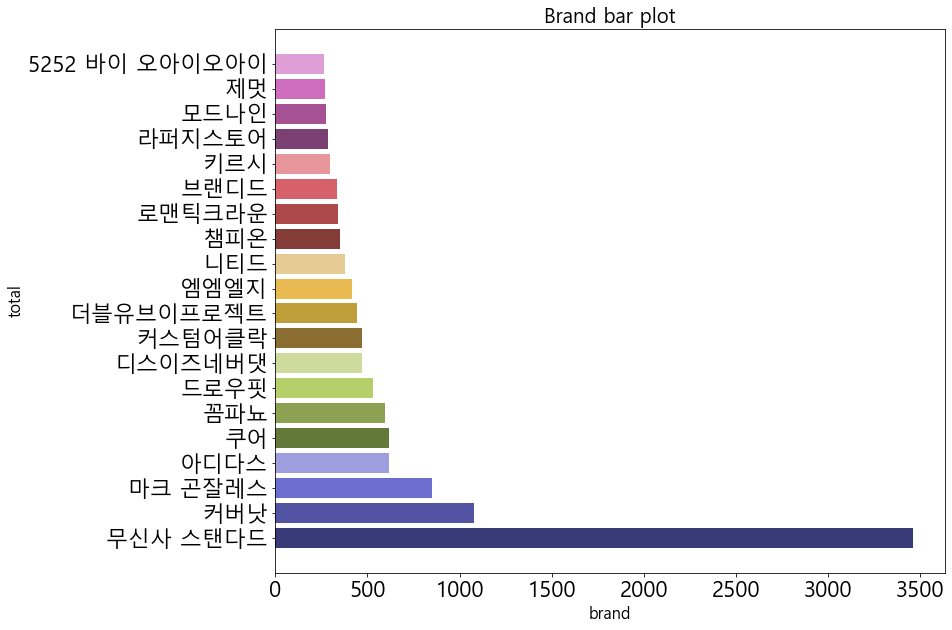

In [73]:
plt.figure(figsize=(12,10))
plt.barh(brand, total, color=colors)
plt.title('Brand bar plot', fontsize=20)
plt.xlabel('brand', fontsize=16)
plt.ylabel('total', fontsize=16)
plt.yticks(brand, fontproperties=font_name)
plt.show()

## 하위 10개 브랜드

In [56]:
import pandas as pd
df =pd.DataFrame(rows)
b_1 = df['brand'][2000:2010]
b_2 = df['brand'][2320:2330]
brand =pd.concat([b_1,b_2])
t_1 = df['sum(carts.products_quantity)'][2000:2010]
t_2 = df['sum(carts.products_quantity)'][2320:2330]
total = pd.concat([t_1,t_2])


In [57]:
total

2000    4
2001    4
2002    4
2003    4
2004    4
2005    4
2006    4
2007    4
2008    4
2009    4
2320    1
2321    1
2322    1
2323    1
2324    1
2325    1
2326    1
2327    1
2328    1
2329    1
Name: sum(carts.products_quantity), dtype: object

In [58]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
path = "C:/Windows/Fonts/malgun.ttf"
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc("font", family=font_name)

In [59]:
import seaborn as sns
colors = sns.color_palette('tab20b',len(brand))

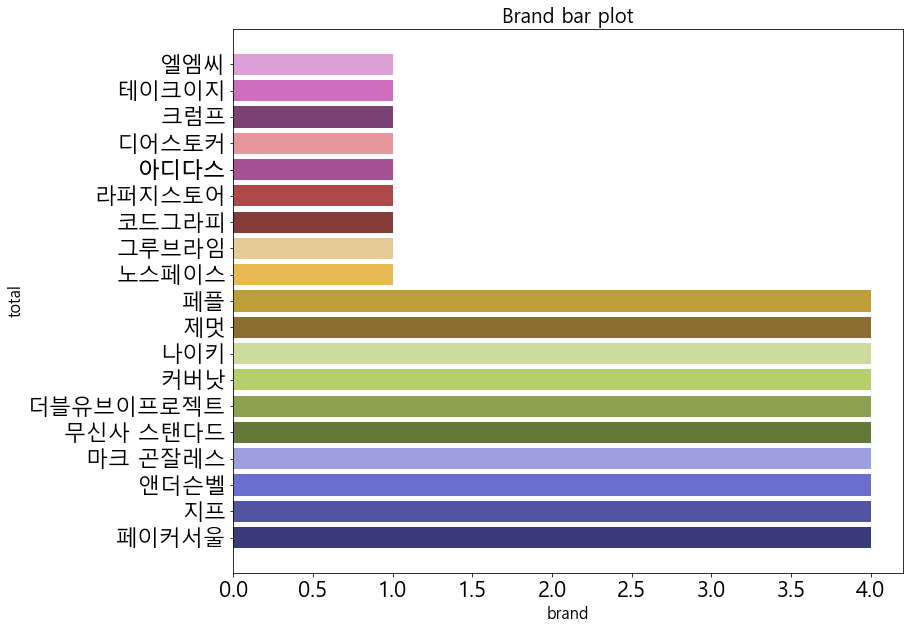

In [61]:
plt.figure(figsize=(12,10))
plt.barh(brand, total, color=colors)
plt.title('Brand bar plot', fontsize=20)
plt.xlabel('brand', fontsize=16)
plt.ylabel('total', fontsize=16)
plt.yticks(brand, fontproperties=font_name)
plt.show()

# 신용카드 분석

In [13]:
import  pymysql
db= pymysql.connect(host='localhost', user='root', password='root', db='musinsa')
curs =db.cursor(pymysql.cursors.DictCursor)
query = "select sum(orders.total_price), credit_cards.type, count(*)" +\
" from orders, credit_cards" +\
" WHERE orders.credit_cards_seq = credit_cards.seq" +\
" GROUP BY credit_cards.type" +\
" ORDER BY sum(orders.total_price) desc;"
curs.execute(query)
rows= curs.fetchall()
for row in rows:
    print(row['sum(orders.total_price)'],row['type'], row['count(*)'])
db.close

107225067 하나 BC 607
17580459 수협카드 193
12824512 비씨카드 122
12742891 저축은행 142
11416074 현대카드 109
11335110 광주카드 107
11252460 SC은행카드 107
10740677 우리카드 98
8897642 제주카드 95
8811526 NH카드 103
8742477 하나카드 92
8569641 카카오뱅크카드 86
8545105 롯데카드 91
8371589 NH채움 75
8262061 KDB산업 82
8138427 케이뱅크 85
8050065 신한카드 85
7352792 카카오뱅크 77
7079343 KB 국민 71
7059264 하나(외환) 69
6767269 삼성카드 83
6674968 씨티카드 79
6623687 전북카드 76
6569412 신협카드 77
6173378 KB증권(현대증권) 74
5818466 MG새마을 72
5746737 비씨카드(페이북) 71


<bound method Connection.close of <pymysql.connections.Connection object at 0x000001B876520040>>

<ipython-input-14-9cbfe6008737>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df.index, fontsize=20, fontproperties=fontprop, rotation=45)


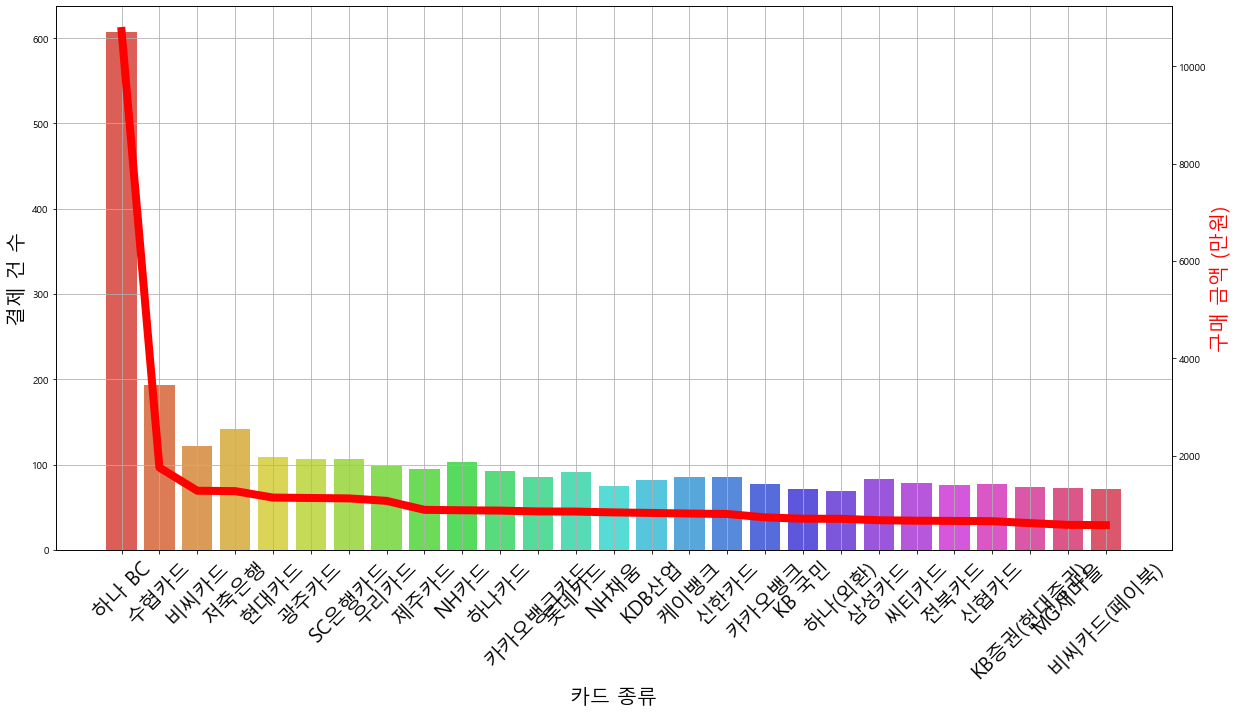

In [14]:
path = "C:/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=path, size=16)
df =pd.DataFrame(rows)
x= df['type']
y1 = df['count(*)']
y2 = (df['sum(orders.total_price)'].astype(str).astype(int))/10000
# Graph
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams['lines.linewidth'] = 8
fig =plt.figure()

#1행 1열
ax1 =fig.add_subplot(1, 1, 1)
ax2= ax1.twinx()
#ax1에 그래프 그리기
colors= sns.color_palette('hls', len(x))
ax1.bar(x, y1, color=colors)

ax1.set_xlabel('카드 종류',fontproperties=fontprop, fontsize=20)
ax1.set_ylabel('결제 건 수',fontproperties=fontprop, fontsize=20)
ax1.grid()
#x축 좌표위의 텍스트 처리
ax1.set_xticklabels(df.index, fontsize=20, fontproperties=fontprop, rotation=45)
#ax2에 그래프 그리기
ax2.plot(x, y2, color='red')
ax2.set_ylabel("구매 금액 (만원)", color='red',fontproperties=fontprop, fontsize=20)
plt.show()

# 연령별 구매 횟수 및 평균 구매 금액 분석

In [7]:
import  pymysql
import pandas as pd
db= pymysql.connect(host='localhost', user='root', password='root', db='musinsa');
curs =db.cursor(pymysql.cursors.DictCursor)
query = "SELECT orders.users_seq, users.birthday, sum(orders.total_price), count(*)" +\
" FROM orders INNER JOIN users" +\
" ON orders.users_seq = users.seq" +\
" GROUP BY orders.users_seq" +\
" ORDER BY count(*) DESC;"
curs.execute(query)
rows = curs.fetchall()
for row in rows:
    print(row['users_seq'], row['birthday'], row['sum(orders.total_price)'], row['count(*)'])
db.close()

35 1919-05-26 1426860 11
38 1954-04-10 1099600 11
82 1995-08-19 945860 11
85 1980-06-26 1404740 11
106 1913-03-11 1558933 11
121 1955-02-25 1331110 11
143 1987-01-19 871980 11
147 1933-02-28 968880 11
152 1994-05-11 914948 11
157 1917-04-22 1844790 11
170 1971-04-15 1166580 11
9 1919-08-17 1226252 10
21 1927-04-16 1276880 10
31 1923-01-21 1559610 10
46 1961-02-21 1550100 10
59 1950-02-09 689892 10
97 1907-03-04 791250 10
101 1929-08-14 1101930 10
109 1974-08-25 1599622 10
128 1919-05-02 1023520 10
129 1916-07-26 1076906 10
156 1934-09-21 1059445 10
162 1994-07-19 1375310 10
164 1905-09-14 1271640 10
181 1910-07-17 851600 10
192 1996-06-18 1676075 10
196 1978-09-22 1007090 10
6 1923-05-24 1106141 9
16 1953-03-06 488126 9
29 1931-01-25 1282670 9
32 1990-09-04 787160 9
42 1960-04-04 996735 9
49 1939-06-29 1063180 9
54 1908-06-09 953990 9
58 1924-04-04 776200 9
60 1924-08-05 804150 9
67 1958-07-14 746380 9
69 1974-01-11 968708 9
77 1986-07-09 1528070 9
80 1997-02-21 1170894 9
81 1987-06-14

994 1915-07-11 343000 3
995 1982-05-19 606980 3
1000 1900-02-10 178860 3
148 1903-05-29 119820 2
201 1960-06-06 99760 2
202 1919-08-04 109300 2
203 1936-02-10 111180 2
210 1945-02-07 159040 2
212 1934-04-22 169440 2
216 1977-03-25 92270 2
218 1908-02-16 211340 2
220 1907-05-27 157740 2
223 1996-05-04 179860 2
229 1974-08-23 112690 2
230 1971-01-22 193720 2
235 1957-08-26 215620 2
244 1947-07-17 402496 2
245 1957-03-07 86920 2
246 1934-02-25 114540 2
254 1926-09-22 344740 2
257 1914-05-27 148960 2
263 1967-06-28 177240 2
267 1976-09-02 94770 2
275 1987-04-06 423680 2
276 1914-07-15 96716 2
281 1941-03-21 107460 2
282 1947-01-07 94300 2
283 1958-02-02 318445 2
291 1980-01-26 438680 2
294 1946-03-01 82030 2
296 1912-05-21 181020 2
299 1913-02-13 103160 2
301 1986-05-23 253840 2
307 1961-06-20 649580 2
308 1950-01-10 131980 2
311 1916-02-18 185440 2
315 1924-08-22 328820 2
316 1976-09-23 124800 2
320 1950-07-08 283940 2
324 1912-03-21 211020 2
338 1906-08-10 91180 2
349 1931-09-07 172520 2

946 1948-03-21 161700 1
947 1908-09-03 98800 1
949 1989-08-13 40820 1
955 1973-06-23 64750 1
958 1967-03-01 48580 1
959 1923-05-06 108100 1
960 1940-04-08 199600 1
964 1926-04-21 59700 1
966 1999-08-05 41040 1
967 1908-09-11 142996 1
974 1931-02-01 155700 1
975 1922-07-13 121060 1
979 1942-08-14 87750 1
980 1903-04-03 77100 1
981 1907-05-22 152220 1
982 1948-09-12 163640 1
986 1932-07-12 52480 1
999 1985-03-21 69500 1


In [8]:
df = pd.DataFrame(rows)
df

,users_seq,birthday,sum(orders.total_price),count(*)
0,35,1919-05-26,1426860,11
1,38,1954-04-10,1099600,11
2,82,1995-08-19,945860,11
3,85,1980-06-26,1404740,11
4,106,1913-03-11,1558933,11
...,...,...,...,...
959,980,1903-04-03,77100,1
960,981,1907-05-22,152220,1
961,982,1948-09-12,163640,1
962,986,1932-07-12,52480,1


In [9]:
import  pymysql
db= pymysql.connect(host='localhost', user='root', password='root', db='musinsa');
curs =db.cursor(pymysql.cursors.DictCursor)
query = "SELECT users.birthday, round(sum(orders.total_price)/count(*)) as avg, count(*)" +\
" FROM orders INNER JOIN users" +\
" ON orders.users_seq = users.seq" +\
" GROUP BY orders.users_seq" +\
" ORDER BY count(*) DESC;"
curs.execute(query)
rows = curs.fetchall()
for row in rows:
    print(row['birthday'], row['avg'], row['count(*)'])
db.close()

1919-05-26 129715 11
1954-04-10 99964 11
1995-08-19 85987 11
1980-06-26 127704 11
1913-03-11 141721 11
1955-02-25 121010 11
1987-01-19 79271 11
1933-02-28 88080 11
1994-05-11 83177 11
1917-04-22 167708 11
1971-04-15 106053 11
1919-08-17 122625 10
1927-04-16 127688 10
1923-01-21 155961 10
1961-02-21 155010 10
1950-02-09 68989 10
1907-03-04 79125 10
1929-08-14 110193 10
1974-08-25 159962 10
1919-05-02 102352 10
1916-07-26 107691 10
1934-09-21 105945 10
1994-07-19 137531 10
1905-09-14 127164 10
1910-07-17 85160 10
1996-06-18 167608 10
1978-09-22 100709 10
1923-05-24 122905 9
1953-03-06 54236 9
1931-01-25 142519 9
1990-09-04 87462 9
1960-04-04 110748 9
1939-06-29 118131 9
1908-06-09 105999 9
1924-04-04 86244 9
1924-08-05 89350 9
1958-07-14 82931 9
1974-01-11 107634 9
1986-07-09 169786 9
1997-02-21 130099 9
1987-06-14 82976 9
1928-05-01 57995 9
1952-01-11 82685 9
1936-04-18 106914 9
1962-06-14 66766 9
1946-01-10 100958 9
1937-04-11 165401 9
1986-09-27 125189 9
1935-06-02 94207 9
1930-08-24 

1984-06-03 108700 2
1911-09-05 68460 2
0000-00-00 117220 1
1931-01-15 99620 1
1959-04-21 43860 1
1962-07-20 142740 1
1941-06-29 104580 1
1939-07-22 78280 1
1979-08-20 155400 1
1995-02-25 393780 1
1944-08-06 73600 1
1977-02-20 80700 1
1949-05-11 50670 1
1901-09-19 199920 1
1941-01-03 74540 1
1971-05-20 417000 1
1967-07-04 67620 1
1905-02-17 95580 1
1926-06-13 121140 1
1972-03-20 178300 1
1923-02-22 177690 1
1912-08-10 206000 1
1939-05-26 71800 1
1940-08-11 81860 1
1923-04-13 286500 1
1955-05-08 212160 1
1939-05-10 43200 1
1972-08-17 55580 1
1967-09-28 59490 1
1960-02-28 288044 1
1970-05-14 73740 1
1989-08-05 70700 1
1945-06-01 48620 1
1946-02-16 162320 1
1959-07-26 44300 1
1989-07-07 331820 1
1945-03-26 79280 1
1991-04-09 85540 1
1904-08-21 183920 1
1988-02-12 82680 1
1943-05-25 38880 1
1904-03-29 57520 1
1971-06-01 75740 1
1976-09-13 50180 1
1947-01-26 38364 1
1939-02-17 39920 1
1953-05-09 174000 1
1934-08-14 87920 1
1997-01-27 37460 1
1951-09-16 167540 1
1945-08-01 45480 1
1940-05-26 

In [10]:
df_2 = pd.DataFrame(rows)
df_2

,birthday,avg,count(*)
0,1919-05-26,129715,11
1,1954-04-10,99964,11
2,1995-08-19,85987,11
3,1980-06-26,127704,11
4,1913-03-11,141721,11
...,...,...,...
959,1903-04-03,77100,1
960,1907-05-22,152220,1
961,1948-09-12,163640,1
962,1932-07-12,52480,1


In [11]:
df2=[]
for i in range(len(df_2)):
    birth = int(str(df['birthday'][i])[0:4])
    if 2000 < birth:
        df2.append(20)
    elif 1995 < birth:
        df2.append(25)
    elif 1990 < birth:
        df2.append(30)
    elif 1985 < birth:
        df2.append(35)
    elif 1980 < birth:
        df2.append(40)
    elif 1985 < birth:
        df2.append(45)
    else:
        df2.append(50)
df2

[50,
 50,
 30,
 50,
 50,
 50,
 35,
 50,
 30,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 30,
 50,
 50,
 25,
 50,
 50,
 50,
 50,
 35,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 35,
 25,
 35,
 50,
 50,
 50,
 50,
 50,
 50,
 35,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 35,
 50,
 50,
 50,
 35,
 25,
 40,
 50,
 50,
 50,
 50,
 30,
 50,
 50,
 50,
 50,
 50,
 25,
 50,
 40,
 50,
 40,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 40,
 50,
 50,
 35,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 30,
 50,
 50,
 25,
 50,
 50,
 50,
 50,
 25,
 50,
 50,
 50,
 50,
 50,
 50,
 35,
 40,
 50,
 50,
 40,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 25,
 35,
 50,
 30,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 25,
 50,
 50,
 50,
 50,
 50,
 50,
 40,
 30,
 50,
 30,
 35,
 50,
 50,
 50,
 50,
 50,
 40,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 25,
 30,
 40,
 50,
 50,
 50,
 50,
 50,
 50,
 30,
 30,
 50,
 30,
 50,
 50,
 25,
 50,
 40,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,


In [12]:
df_2['birthday']=df2
df_2['birthday']

0      50
1      50
2      30
3      50
4      50
       ..
959    50
960    50
961    50
962    50
963    40
Name: birthday, Length: 964, dtype: int64

In [13]:
df_sum =df.groupby(['birthday']).sum()
df_sum

,users_seq,count(*)
birthday,,
1900-02-10,1000,3
1900-06-03,740,1
1900-06-25,617,2
1900-07-06,775,1
1901-01-02,100,7
...,...,...
1999-08-05,966,1
1999-08-13,865,1
1999-09-03,421,3


In [18]:
import seaborn as sns
birthday = df_2['birthday']
avg = df_2['avg']
colors = sns.color_palette('Pastel1',len(birthday))

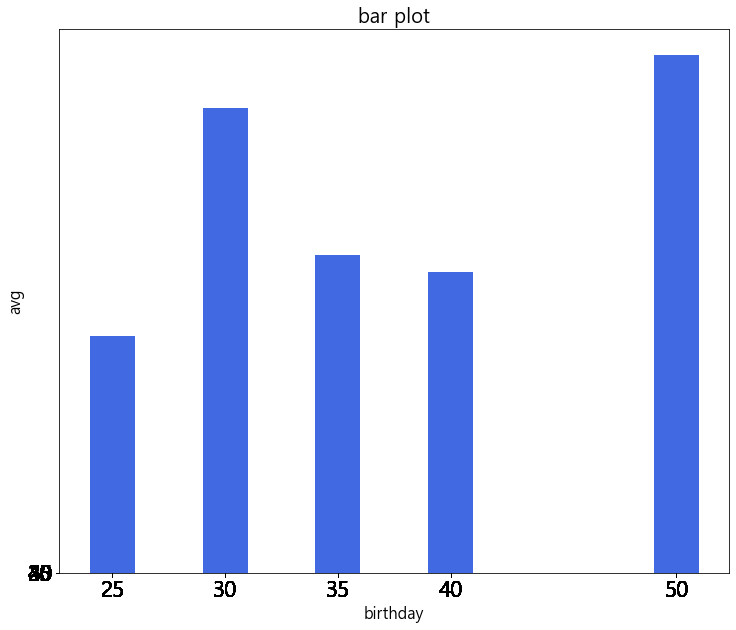

In [22]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
path = "C:/Windows/Fonts/malgun.ttf"
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc("font", family=font_name)
plt.figure(figsize=(12,10))
plt.bar(birthday, avg, color='royalblue', width=2, tick_label=birthday)
plt.rcParams.update({'font.size': 22})
plt.title('Age plot', fontsize=30)
plt.xlabel('Birthday', fontsize=16)
plt.ylabel('Avg', fontsize=16)
plt.yticks(birthday, fontproperties=font_name)
plt.show()

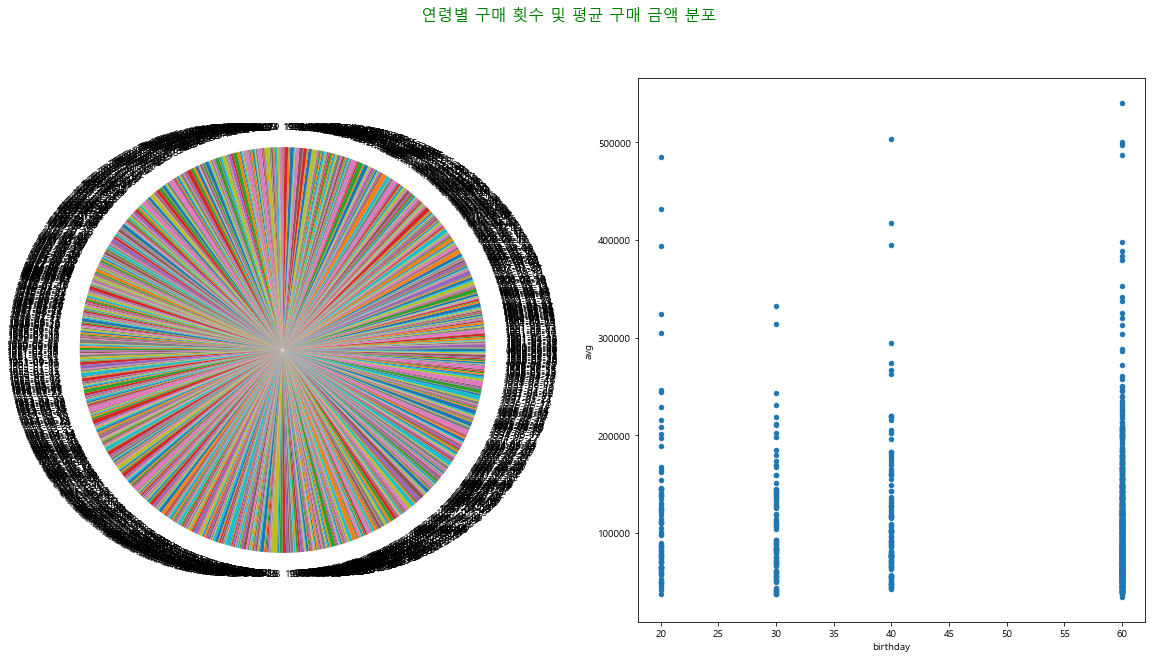

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
path = "C:/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=path, size=16)

fig = plt.figure()

fig.suptitle('연령별 구매 횟수 및 평균 구매 금액 분포', color="Green",fontproperties=fontprop)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

df_sum['count(*)'].plot.pie(ax=ax1)
df_2.plot.scatter(x='birthday', y='avg', ax=ax2)
plt.show()

# 고객 사이즈 분석

In [74]:
import  pymysql
import pandas as pd
db= pymysql.connect(host='localhost', user='root', password='root', db='musinsa');
curs =db.cursor(pymysql.cursors.DictCursor)
query = "SELECT orders.users_seq, users.birthday, sum(orders.total_price), count(*), users.size, users.height" +\
" FROM orders INNER JOIN users" +\
" ON orders.users_seq = users.seq" +\
" GROUP BY orders.users_seq" +\
" ORDER BY count(*) DESC;"
curs.execute(query)
rows = curs.fetchall()
for row in rows:
    print(row['users_seq'], row['birthday'], row['sum(orders.total_price)'], row['count(*)'], row['size'], row['height'])
db.close()

35 1919-05-26 1426860 11 L 178
38 1954-04-10 1099600 11 S 169
82 1995-08-19 945860 11 M 166
85 1980-06-26 1404740 11 XL 187
106 1913-03-11 1558933 11 L 178
121 1955-02-25 1331110 11 L 176
143 1987-01-19 871980 11 M 168
147 1933-02-28 968880 11 L 166
152 1994-05-11 914948 11 XL 183
157 1917-04-22 1844790 11 L 175
170 1971-04-15 1166580 11 S 156
9 1919-08-17 1226252 10 M 160
21 1927-04-16 1276880 10 M 167
31 1923-01-21 1559610 10 M 169
46 1961-02-21 1550100 10 S 152
59 1950-02-09 689892 10 2XL 190
97 1907-03-04 791250 10 L 170
101 1929-08-14 1101930 10 M 168
109 1974-08-25 1599622 10 XL 183
128 1919-05-02 1023520 10 L 164
129 1916-07-26 1076906 10 S 159
156 1934-09-21 1059445 10 S 164
162 1994-07-19 1375310 10 M 168
164 1905-09-14 1271640 10 S 150
181 1910-07-17 851600 10 M 160
192 1996-06-18 1676075 10 L 174
196 1978-09-22 1007090 10 XL 183
6 1923-05-24 1106141 9 L 179
16 1953-03-06 488126 9 L 173
29 1931-01-25 1282670 9 M 167
32 1990-09-04 787160 9 M 169
42 1960-04-04 996735 9 L 170
49

452 1998-05-13 435880 3 L 171
456 1953-01-21 146360 3 M 165
467 1953-02-22 617196 3 M 169
468 1970-01-25 625540 3 XL 182
477 1926-04-28 134140 3 L 177
482 1956-01-21 242440 3 L 179
490 1966-06-15 213740 3 L 167
496 1934-08-12 191380 3 L 163
507 1922-02-14 321776 3 XL 188
510 1989-08-21 419520 3 XL 189
512 1907-01-07 254180 3 S 155
516 1928-09-04 155940 3 M 169
520 1941-08-13 219340 3 XL 186
524 1924-09-01 339640 3 S 159
529 1974-03-26 787440 3 XL 165
535 1912-01-08 499550 3 S 156
539 1972-06-17 352365 3 XL 182
544 1945-03-12 293600 3 XL 188
545 1978-07-02 614290 3 L 170
546 1986-09-06 593140 3 M 161
550 1930-06-23 307150 3 XL 185
552 1916-03-27 316370 3 L 175
553 1962-07-13 171860 3 S 151
559 1903-01-06 210840 3 L 176
567 1938-06-16 224140 3 XL 184
572 1939-01-25 175840 3 M 167
576 1922-08-04 169660 3 M 165
582 1984-04-09 277220 3 S 156
593 1999-03-28 363088 3 XL 182
594 1962-03-27 371920 3 L 176
600 1943-02-15 178984 3 L 170
603 1965-02-01 228940 3 M 169
606 1907-04-04 149060 3 M 168


996 1939-04-04 235260 2 L 171
997 1984-06-03 217400 2 L 167
998 1911-09-05 136920 2 M 166
206 0000-00-00 117220 1 XL 187
213 1931-01-15 99620 1 L 171
215 1959-04-21 43860 1 L 171
219 1962-07-20 142740 1 S 158
224 1941-06-29 104580 1 XL 183
226 1939-07-22 78280 1 L 179
228 1979-08-20 155400 1 2XL 162
232 1995-02-25 393780 1 XL 184
234 1944-08-06 73600 1 XL 167
236 1977-02-20 80700 1 L 180
241 1949-05-11 50670 1 S 158
242 1901-09-19 199920 1 S 157
248 1941-01-03 74540 1 L 174
250 1971-05-20 417000 1 M 161
252 1967-07-04 67620 1 S 154
256 1905-02-17 95580 1 L 178
260 1926-06-13 121140 1 XL 184
261 1972-03-20 178300 1 XL 160
278 1923-02-22 177690 1 XL 189
284 1912-08-10 206000 1 XL 182
288 1939-05-26 71800 1 L 161
290 1940-08-11 81860 1 L 175
293 1923-04-13 286500 1 M 164
295 1955-05-08 212160 1 L 174
298 1939-05-10 43200 1 XL 183
302 1972-08-17 55580 1 L 175
303 1967-09-28 59490 1 L 177
304 1960-02-28 288044 1 L 172
305 1970-05-14 73740 1 S 153
312 1989-08-05 70700 1 L 167
313 1945-06-01 

In [76]:
df= pd.DataFrame(rows)
df

,users_seq,birthday,sum(orders.total_price),count(*),size,height
0,35,1919-05-26,1426860,11,L,178
1,38,1954-04-10,1099600,11,S,169
2,82,1995-08-19,945860,11,M,166
3,85,1980-06-26,1404740,11,XL,187
4,106,1913-03-11,1558933,11,L,178
...,...,...,...,...,...,...
959,980,1903-04-03,77100,1,XL,189
960,981,1907-05-22,152220,1,L,172
961,982,1948-09-12,163640,1,M,163
962,986,1932-07-12,52480,1,S,150


In [78]:
df2=[]
for i in range(len(df_2)):
    birth = int(str(df['birthday'][i])[0:4])
    if 2000 < birth:
        df2.append(20)
    elif 1995 < birth:
        df2.append(25)
    elif 1990 < birth:
        df2.append(30)
    elif 1985 < birth:
        df2.append(35)
    elif 1980 < birth:
        df2.append(40)
    elif 1985 < birth:
        df2.append(45)
    else:
        df2.append(50)
df2
df['birthday']=df2

In [85]:
# 키는 평균값을 넣어줌
height=df.groupby(['size']).mean()
height=height['height']


In [86]:
df_sum_size =df.groupby(['size']).sum()
df_sum_size['height']=height

In [89]:
del df_sum_size['birthday']
del df_sum_size['users_seq']


In [119]:
df=df_sum_size
df

,count(*),height
size,,
2XL,48,185.235294
L,1154,172.840206
M,676,164.567568
S,597,156.647059
XL,553,181.802139


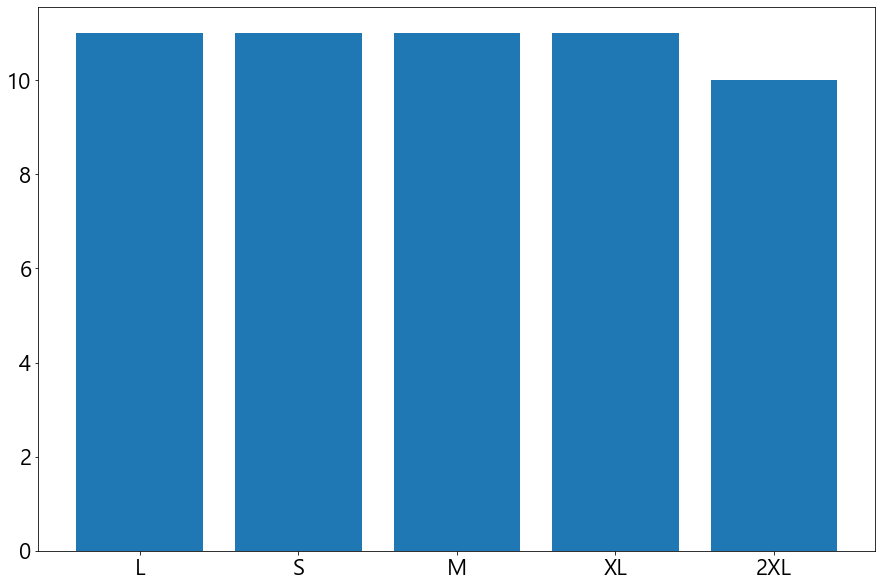

In [111]:
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams['axes.grid'] = False
plt.bar(df['size'],df['count(*)'])
plt.show()

In [115]:
import chart_studio.plotly as py
#import plotly.grath_objs as go
import cufflinks as cf
cf.go_offline(connected=True)

In [124]:
del df_sum_size['height']


In [135]:
layout = {
    'font': {
        'family': 'consolas',
        'size': 20,
        'color': 'blue'
    }
}
layout['title'] = "사이즈 별 구매횟수"



In [137]:
themes = cf.getThemes()
df.iplot(kind='bar', theme='pearl', layout=layout)